<a href="https://colab.research.google.com/github/Cin1297/Komputasi-Lanjut-dan-Big-Data-2022/blob/main/Project_Klasifikasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [161]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [162]:
from google.colab import files
uploaded = files.upload()

Saving Project UTS - Sheet1.csv to Project UTS - Sheet1 (2).csv


In [165]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Project UTS - Sheet1.csv']))
# Dataset is now stored in a Pandas Dataframe

In [136]:
df.head()

,SukaMTKSMA,NilaiMTKsem6,Alatbantupenglihatan,TB,BB,Games1,Games2,waktu_Medsos,label
0,1,92.0,0,159.0,82.0,0.37,0.46,4.0,S1 Fisika
1,1,96.0,1,150.0,55.0,0.77,0.74,3.0,S1 Kimia
2,1,92.0,1,175.0,102.0,0.26,0.27,3.0,S1 Kimia
3,1,88.0,0,170.0,68.0,0.68,0.71,4.0,S1 Kimia
4,1,93.0,1,151.0,50.0,0.84,0.80,5.0,S1 Kimia


In [166]:
len(df)
df['label'].unique()

array(['S1 Fisika', 'S1 Kimia', 'S1 Geografi', 'S1 Geologi',
       'S1 Geofisika', 'S1 Statistika', 'S1 Matematika', 'S1 Aktuaria'],
      dtype=object)

In [167]:
df.isnull().values.any()

False

In [168]:
pd.value_counts(df.label)

S1 Geografi      141
S1 Kimia         119
S1 Fisika        118
S1 Matematika     84
S1 Geologi        78
S1 Statistika     76
S1 Geofisika      59
S1 Aktuaria       58
Name: label, dtype: int64

In [169]:
df.describe()

,SukaMTKSMA,NilaiMTKsem6,Alatbantupenglihatan,TB,BB,Games1,Games2,waktu_Medsos
count,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000
mean,0.822647,89.971214,0.512960,164.726467,59.038199,0.501405,0.508417,4.574057
std,0.382228,6.948100,0.500173,8.566711,14.116887,0.463587,1.016728,2.712193
min,0.000000,0.000000,0.000000,143.000000,37.000000,0.000000,0.000000,0.000000
25%,1.000000,87.000000,0.000000,158.000000,49.000000,0.300000,0.300000,3.000000
50%,1.000000,90.000000,1.000000,165.000000,56.000000,0.400000,0.400000,4.000000
75%,1.000000,94.000000,1.000000,171.000000,65.000000,0.620000,0.610000,6.000000
max,1.000000,100.000000,1.000000,188.000000,170.000000,8.630000,26.670000,16.000000


In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 733 entries, 0 to 732
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SukaMTKSMA            733 non-null    int64  
 1   NilaiMTKsem6          733 non-null    float64
 2   Alatbantupenglihatan  733 non-null    int64  
 3   TB                    733 non-null    float64
 4   BB                    733 non-null    float64
 5   Games1                733 non-null    float64
 6   Games2                733 non-null    float64
 7   waktu_Medsos          733 non-null    float64
 8   label                 733 non-null    object 
dtypes: float64(6), int64(2), object(1)
memory usage: 51.7+ KB


In [171]:
df.isnull().sum()

SukaMTKSMA              0
NilaiMTKsem6            0
Alatbantupenglihatan    0
TB                      0
BB                      0
Games1                  0
Games2                  0
waktu_Medsos            0
label                   0
dtype: int64

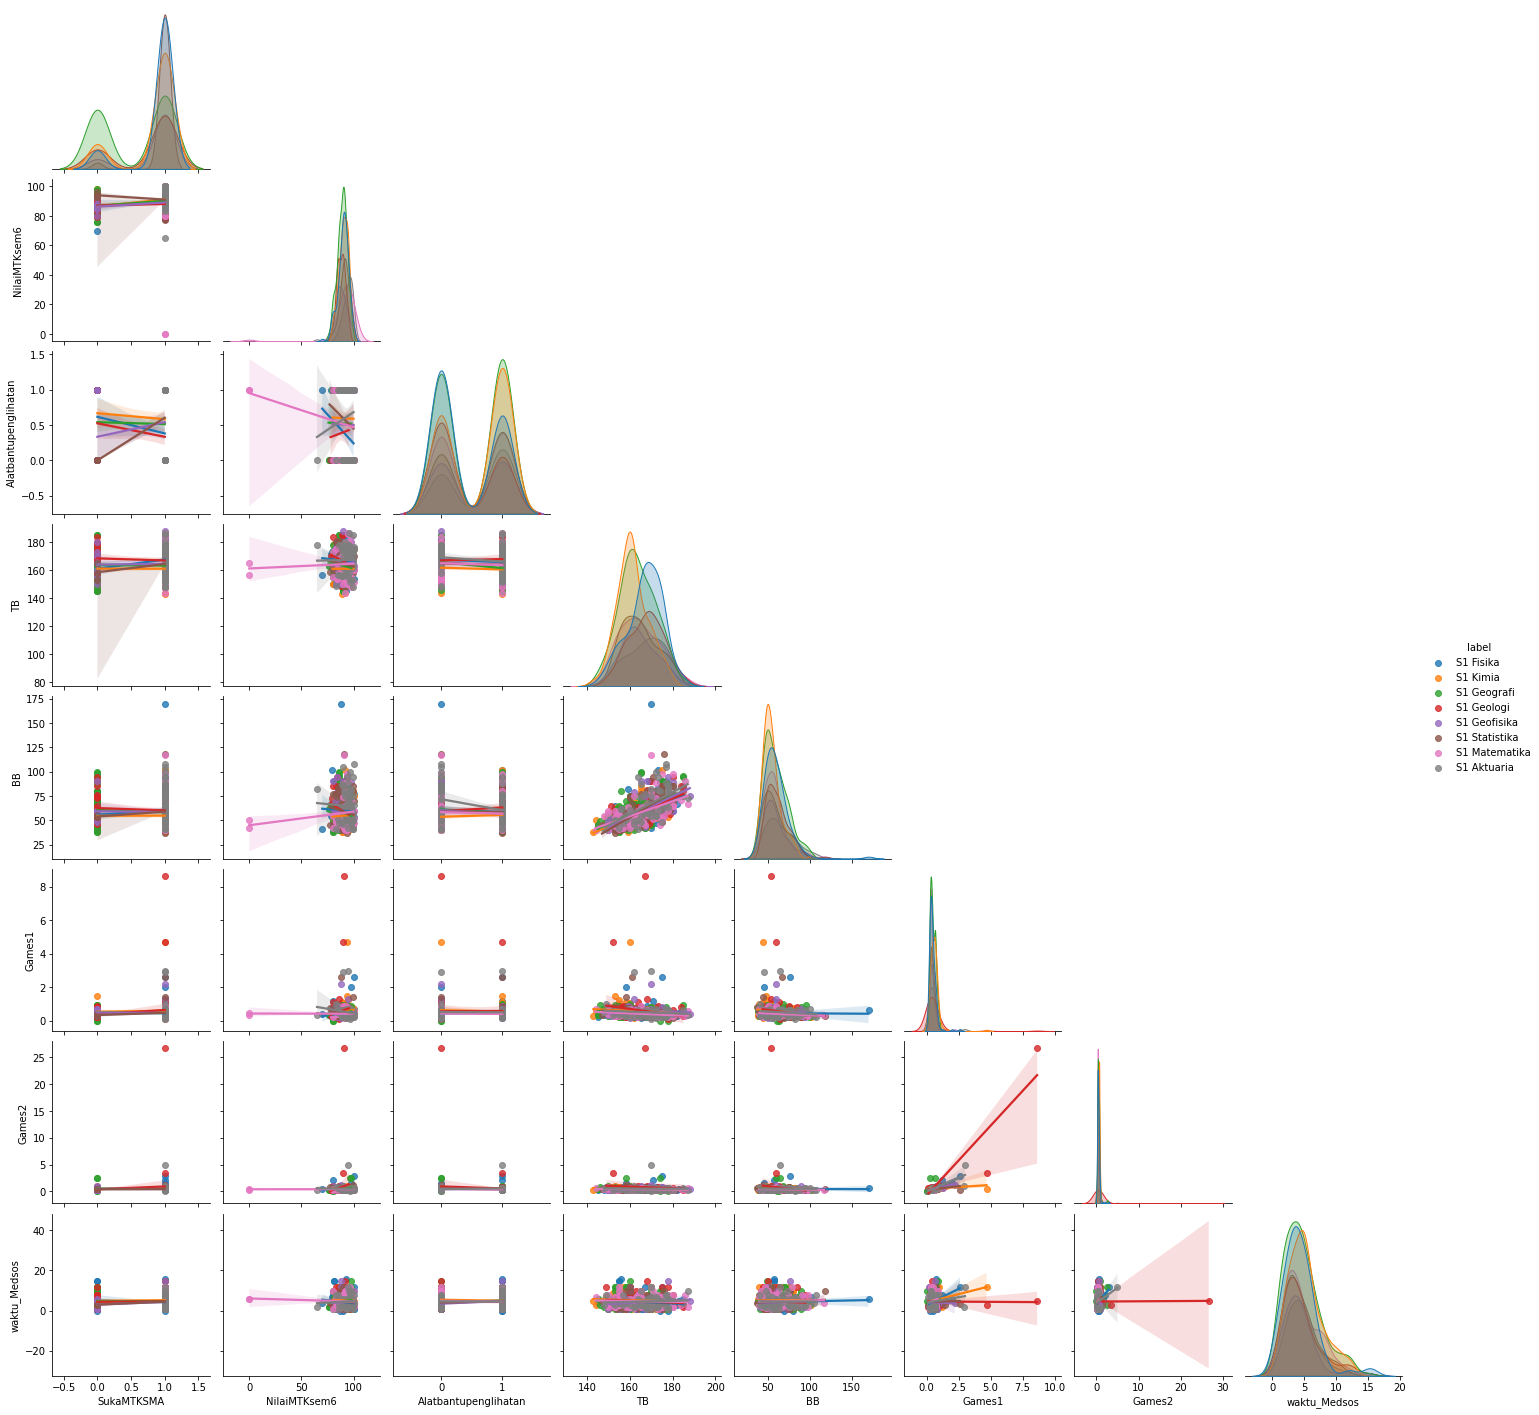

In [172]:
sns.pairplot(df, hue="label", corner=True, kind='reg')

In [173]:
train = df.sample(frac=0.7, random_state=500) # random state is a seed value

In [174]:
test = df.drop(train.index)

In [175]:
X_train = train.drop(labels='label', axis=1)

In [176]:
y_train = train.label

In [177]:
X_test = test.drop(labels='label', axis=1)

In [178]:
y_test = test.label

In [179]:
print(X_train.head(),"\n", y_train.head())

     SukaMTKSMA  NilaiMTKsem6  Alatbantupenglihatan     TB    BB  Games1  \
365           1          91.0                     0  173.0  73.0    0.23   
298           1          90.0                     0  153.0  58.8    0.48   
132           1          87.0                     0  167.0  56.0    0.38   
592           1          90.0                     0  160.0  48.0    0.35   
303           0          89.0                     1  169.0  55.0    0.26   

     Games2  waktu_Medsos  
365    0.25           5.0  
298    0.33           5.0  
132    0.43           6.0  
592    0.35           4.0  
303    0.24           2.5   
 365       S1 Fisika
298     S1 Geografi
132      S1 Geologi
592    S1 Geofisika
303        S1 Kimia
Name: label, dtype: object


In [180]:
X_train.shape,X_test.shape

((513, 8), (220, 8))

In [181]:
y_train.shape,y_test.shape

((513,), (220,))

In [182]:
import matplotlib.pyplot as plt 

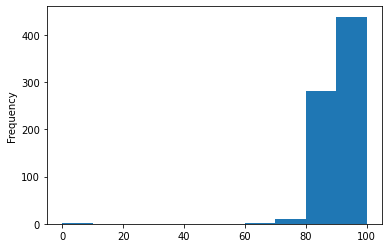

In [119]:
df['NilaiMTKsem6'].plot(kind='hist')

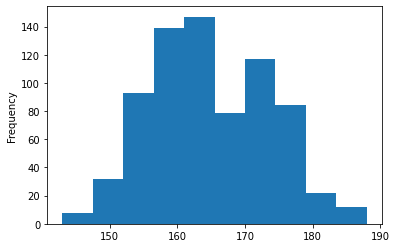

In [120]:
df['TB'].plot(kind='hist')

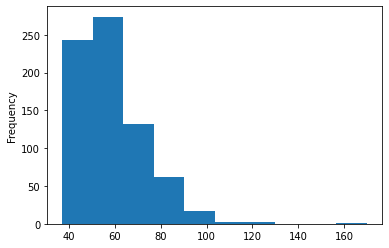

In [121]:
df['BB'].plot(kind='hist')

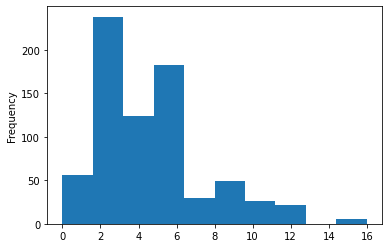

In [122]:
df['waktu_Medsos'].plot(kind='hist')


In [183]:
from sklearn.neighbors import KNeighborsClassifier

In [239]:
knn = KNeighborsClassifier(n_neighbors=300)

In [240]:
knn = KNeighborsClassifier(n_neighbors=300)

In [241]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=300)

In [242]:
knn.score(X_test,y_test)

0.22727272727272727

In [245]:
results = knn.predict(X_test)
print(X_test)
print(results)

     SukaMTKSMA  NilaiMTKsem6  Alatbantupenglihatan     TB    BB  Games1  \
3             1          88.0                     0  170.0  68.0    0.68   
7             1          98.0                     1  149.0  48.0    0.62   
8             1          95.0                     1  161.0  46.0    0.28   
14            1          95.0                     0  155.0  48.0    1.24   
15            1          88.0                     0  166.0  53.0    0.64   
..          ...           ...                   ...    ...   ...     ...   
721           1          87.0                     1  157.0  60.0    0.29   
724           1          90.0                     0  170.0  48.0    0.32   
727           1          85.0                     0  180.0  75.0    0.41   
729           0          80.0                     1  155.0  38.0    0.58   
732           0          94.0                     1  157.0  47.0    0.57   

     Games2  waktu_Medsos  
3      0.71           4.0  
7      0.67           7.0  
8  